In [1]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


use http://www.interactivenn.net/index.html to plot venn plot

In [11]:
method_review = pd.read_excel('method_review_data.xlsx',sheet_name=0,header=None)
method_dataset = pd.read_excel('method_review_data.xlsx',sheet_name=1,header=None)
review = pd.read_excel('method_review_data.xlsx',sheet_name=2,header=None)

In [23]:
method_review = method_review.replace(np.nan,0)

## venn plot

In [24]:
review_dict = {
    '1':[],
    '2':[],
    '3':[],
    '4':[],
    '5':[],

    '6':[],

    '7':[],
}
for i in range(len(method_review)):
    method_name = method_review.iloc[i][0]
    for j in range(3,10):
        if method_review.iloc[i][j] !=0:
            review_dict[str(j-2)].append(method_name)

In [33]:
tmp = review_dict['1']
for i in tmp:
    print(i)

Trendsceek
SpatialDE
SPARK
SPARK-X
sepal
SpaGCN[SA]
GLISS
stLearn
MULTILAYER
smfishHMRF
BayesSpace[SC]
SC-MEB
STAGATE
SpaGCN[SC]
spatialDWLS
SPOTlight 
RCTD
stereoscope
DSTG
Tangram[SD]
Cell2location
MIA
Tangram[GI]
gimVI
Harmony
LIGER
SpaGE
stPlus
HistoGene
ST-Net
xFuse
SVCA
GCNG
NCEM
MISTy
Squidpy
BayesSpace[RE]
Seurat


In [41]:
tmp = review_dict['5']
for i in tmp:
    print(i)

Trendsceek
SpatialDE
SPARK
stLearn
BayesSpace[SC]
spatialDWLS
SPOTlight 
RCTD
stereoscope
Tangram[SD]
Cell2location
MIA
Tangram[GI]
ST-Net
xFuse
JSTA
Baysor
BayesSpace[RE]
pciSeq
Giotto
Seurat
DestVI
FICT
Haystack
PASTE


## method_dataset

In [46]:
method_dataset = method_dataset.replace(np.nan,-1)

In [57]:
method_dataset.iloc[4]

0     -1
1     -1
2     -1
3   -1.0
4     -1
5     -1
6   -1.0
7   -1.0
8     -1
Name: 4, dtype: object

In [59]:
method_dataset = method_dataset.drop(index=[4,37,49])

In [72]:
method_dataset

,0,1,2,3,4,5,6,7,8,is_covered
0,Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,1
1,SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,1
2,SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,1
3,SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,1
5,sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,1
...,...,...,...,...,...,...,...,...,...,...
63,MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,1
64,Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,1
65,PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,1
66,scGCO,Identification of spatially variable genes wit...,22,-1.0,-1,-1,-1.0,-1.0,-1,1


In [73]:
is_covered_list = []
for i in range(len(method_dataset)):
    is_covered = 1
    positive_count = 0
    for j in range(2,9):
        if 'et al' in str(method_dataset.iloc[i][j]):
            is_covered = 0
        else:
            if int(method_dataset.iloc[i][j])>=0:
                positive_count+=1
    if is_covered==0:
        if positive_count>0:
            is_covered_list.append(1)
        else:
            is_covered_list.append(0)
    else:
        is_covered_list.append(2)


        
    
method_dataset['is_covered'] = is_covered_list

In [79]:
method_dataset = method_dataset.set_index(0)

In [80]:
method_dataset

,1,2,3,4,5,6,7,8,is_covered
0,,,,,,,,,
Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,2
SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,2
SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,2
SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,2
sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,2
...,...,...,...,...,...,...,...,...,...
MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,2
Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,2
PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,2


In [83]:
method_review = method_review.set_index(0)

In [88]:
method_dataset['type'] = method_review.loc[method_dataset.index][2]

In [94]:
method_dataset

,1,2,3,4,5,6,7,8,is_covered,type
0,,,,,,,,,,
Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,2,SE analysis
sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
...,...,...,...,...,...,...,...,...,...,...
MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,2,SE analysis
PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,2,Alignment


In [107]:
dataset_unique = method_dataset.values[:,1:8].astype('str')

In [108]:
dataset_unique

array([['22', '93.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['22', '93.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['22', '34.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['1', '2.0', '90', '-1', '-1.0', '-1.0', '-1'],
       ['78', '19.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['15', '6.0', '78', '91', '-1.0', '-1.0', '-1'],
       ['22', '-1.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['78', '6.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['22', '18.0', '15', '76', '2.0', '20.0', '-1'],
       ['Zhu et al., 2018', '-1.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['6', '19.0', '78', '-1', '-1.0', '-1.0', '-1'],
       ['6', '-1.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['6', '19.0', '82', '78', '-1.0', '-1.0', '-1'],
       ['15', '6.0', '78', '91', '-1.0', '-1.0', '-1'],
       ['38', '18.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['78', '-1.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['1', '2.0', '-1', '-1', '-1.0', '-1.0', '-1'],
       ['78', '18.0', '-1', 

In [109]:
dataset_unique = np.unique(dataset_unique)

In [110]:
dataset_unique

array(['-1', '-1.0', '1', '1.0', '11', '15', '18.0', '19.0', '2', '2.0',
       '20.0', '21.0', '22', '22.0', '26', '28', '30', '33.0', '34',
       '34.0', '35', '35.0', '36', '36.0', '38', '38.0', '6', '6.0', '76',
       '78', '78.0', '82', '90', '91', '91.0', '93', '93.0',
       'Kleshchevnikov et al., 2022', 'Lopez et al., 2022',
       'Petukhov et al., 2021', 'Qian et al., 2019', 'Qian et al., 2020',
       'Zhu et al., 2018'], dtype='<U27')

In [119]:
dataset_unique_remove_etal = []
for i in dataset_unique:
    if 'et al' not in i and '-1' not in i:
        dataset_unique_remove_etal.append(i)
dataset_unique_remove_etal = np.array(dataset_unique_remove_etal).astype('float').astype('int')
# dataset_unique_remove_etal = 
dataset_unique_remove_etal = np.unique(dataset_unique_remove_etal)

In [127]:
method_dataset

,1,2,3,4,5,6,7,8,is_covered,type,...,dataset_34,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93
0,,,,,,,,,,,,,,,,,,,,,
Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,2,Alignment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
for dsu in dataset_unique_remove_etal:
    column_name = f'dataset_{dsu}'
    method_dataset[column_name] = np.zeros(shape=(len(method_dataset),))

for i in range(len(method_dataset)):
    for j in range(2,9):
        cur_dataset = str(method_dataset.iloc[i][j])
        if 'et al' in cur_dataset:
            continue
        if '-1' in cur_dataset:
            continue
        cur_dataset_int = int(float(cur_dataset))
        method_dataset.iloc[i, method_dataset.columns.get_loc(f'dataset_{cur_dataset_int}')] = 1
        # method_dataset.iloc[i][f'dataset_{cur_dataset_int}']=1
        
        
# dataset_dict = {}
# for i in range(len(method_dataset)):
    

In [143]:
method_dataset.loc['PASTE','dataset_6']

1.0

In [145]:
method_dataset

,1,2,3,4,5,6,7,8,is_covered,type,...,dataset_34,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93
0,,,,,,,,,,,,,,,,,,,,,
Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,2,SE analysis,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,2,Alignment,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
method_dataset = method_dataset.reset_index()

In [156]:
method_dataset = method_dataset.set_index(0)

In [159]:
method_dataset = method_dataset.rename(columns={0:'method',1:'method_pub',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'})

In [160]:
method_dataset.columns

Index(['method_pub', '2', '3', '4', '5', '6', '7', '8', 'is_covered', 'type',
       'dataset_1', 'dataset_2', 'dataset_6', 'dataset_11', 'dataset_15',
       'dataset_18', 'dataset_19', 'dataset_20', 'dataset_21', 'dataset_22',
       'dataset_26', 'dataset_28', 'dataset_30', 'dataset_33', 'dataset_34',
       'dataset_35', 'dataset_36', 'dataset_38', 'dataset_76', 'dataset_78',
       'dataset_82', 'dataset_90', 'dataset_91', 'dataset_93'],
      dtype='object')

In [162]:
method_dataset = method_dataset.reset_index()

In [164]:
method_dataset = method_dataset.rename(columns={0:'method'})

In [167]:
method_dataset = method_dataset.astype('str')

In [168]:
method_dataset.to_feather('method_dataset.feather')

In [169]:
method_dataset

,method,method_pub,2,3,4,5,6,7,8,is_covered,...,dataset_34,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93
0,Trendsceek,Identification of spatial expression trends in...,22,93.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SpatialDE,SpatialDE: identification of spatially variabl...,22,93.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,SPARK,Statistical analysis of spatial expression pat...,22,34.0,-1,-1,-1.0,-1.0,-1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SPARK-X,SPARK-X: non-parametric modeling enables scala...,1,2.0,90,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,sepal,sepal: identifying transcript profiles with sp...,78,19.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,MERINGUE,Characterizing spatial gene expression heterog...,34,2.0,-1,-1,-1.0,-1.0,-1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,Haystack,A clustering-independent method for finding di...,78,-1.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62,PASTE,Alignment and integration of spatial transcrip...,22,6.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,scGCO,Identification of spatially variable genes wit...,22,-1.0,-1,-1,-1.0,-1.0,-1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
dataset_used_list = []
for i in method_dataset.columns:
    if 'dataset' in i:
        dataset_used_list.append(i)

In [180]:
method_dataset_mat = method_dataset.loc[:,dataset_used_list].astype('float')

In [183]:
method_dataset_mat.shape

(65, 24)

<AxesSubplot:>

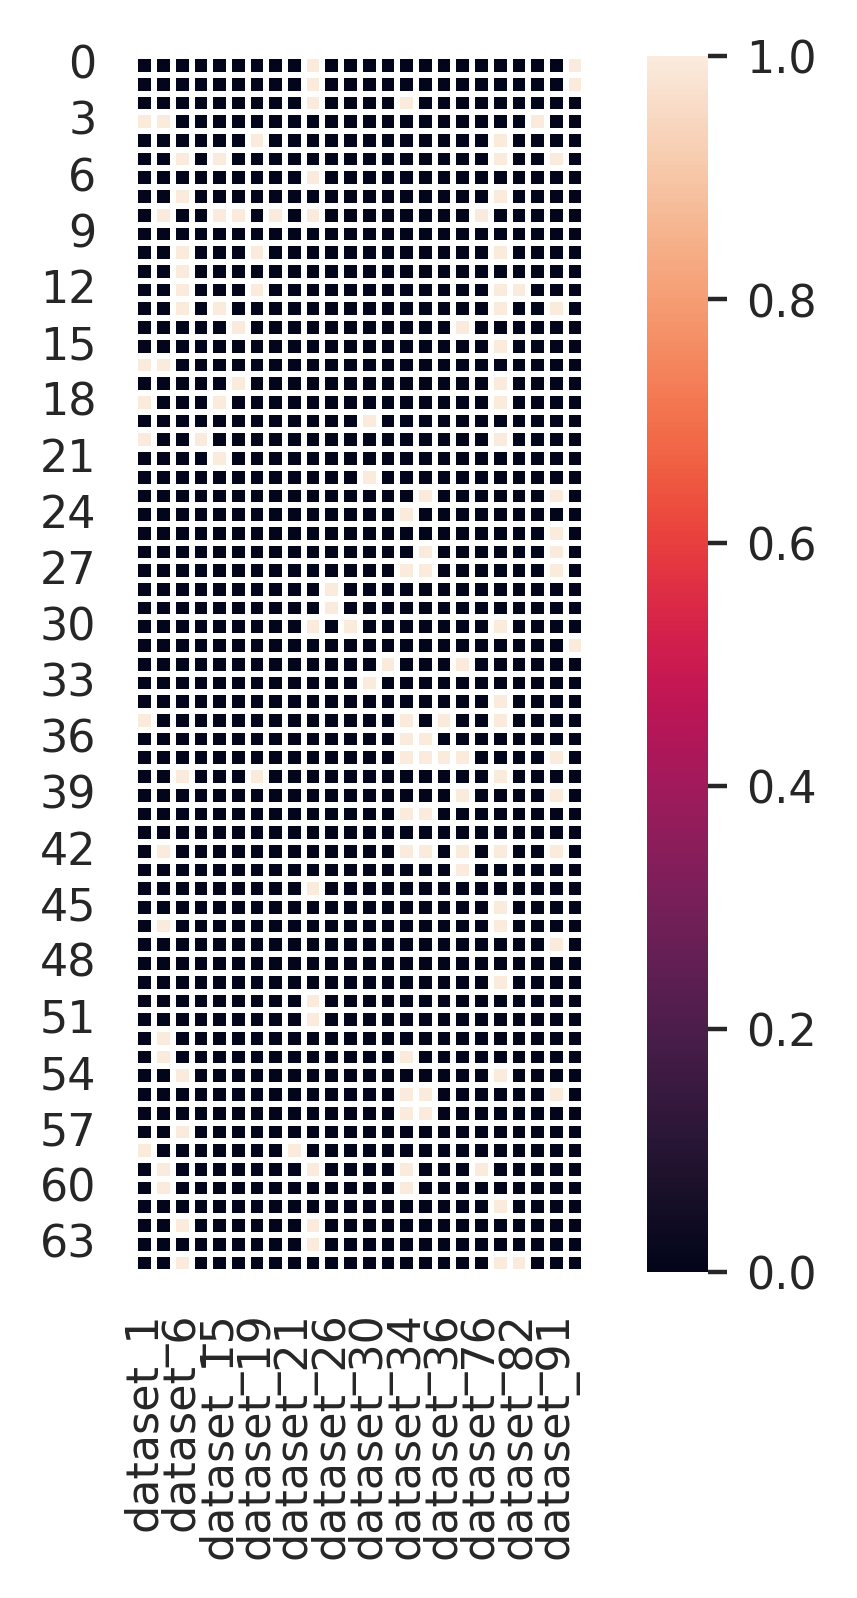

In [184]:
sns.heatmap(method_dataset_mat,square=True,linewidths=0.75)